In [ ]:
#@title <center><h1>**UNIVERSIDAD INDUSTRIAL DE SANTANDER - UIS**</h1></center>

###INTELIGENCIA ARTIFICIAL I - GRUPO H2

In [1]:
#@title MONTAR EL DRIVE
import os
from google.colab import drive
drive.mount('/content/drive')
os.chdir('/content/drive/My Drive/Proyecto IA')
print(os.getcwd())

Mounted at /content/drive
/content/drive/My Drive/Proyecto IA


In [ ]:
#@title <i>Imagen 1:</i> Banner

from IPython.display import Image
Image('banner.jpg')

In [3]:
#@title Librerias
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

In [4]:
#@title RUTAS Dataset de imágenes
coches_far="/content/drive/MyDrive/Proyecto IA/OwnCollection/vehicles/Far"
coches_left="/content/drive/MyDrive/Proyecto IA/OwnCollection/vehicles/Left"
coches_middle="/content/drive/MyDrive/Proyecto IA/OwnCollection/vehicles/MiddleClose"
coches_right="/content/drive/MyDrive/Proyecto IA/OwnCollection/vehicles/Right"

no_coches_far="/content/drive/MyDrive/Proyecto IA/OwnCollection/non-vehicles/Far"
no_coches_left="/content/drive/MyDrive/Proyecto IA/OwnCollection/non-vehicles/Left"
no_coches_middle="/content/drive/MyDrive/Proyecto IA/OwnCollection/non-vehicles/MiddleClose"
no_coches_right="/content/drive/MyDrive/Proyecto IA/OwnCollection/non-vehicles/Right"



In [5]:
#@title Carga de imágenes de coches
img_size = 80
img_coches = []

for img in os.listdir(coches_far):
  img = cv2.imread(os.path.join(coches_far, img))
  img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  img_gray_resize = cv2.resize(img_gray, (img_size, img_size))
  img_coches.append([img_gray_resize]) 

for img in os.listdir(coches_left):
  img = cv2.imread(os.path.join(coches_left, img))
  img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  img_gray_resize = cv2.resize(img_gray, (img_size, img_size))
  img_coches.append([img_gray_resize])

for img in os.listdir(coches_middle):
  img = cv2.imread(os.path.join(coches_middle, img))
  img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  img_gray_resize = cv2.resize(img_gray, (img_size, img_size))
  img_coches.append([img_gray_resize])

for img in os.listdir(coches_right):
  img = cv2.imread(os.path.join(coches_right, img))
  img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  img_gray_resize = cv2.resize(img_gray, (img_size, img_size))
  img_coches.append([img_gray_resize])

print(len(img_coches))

3425


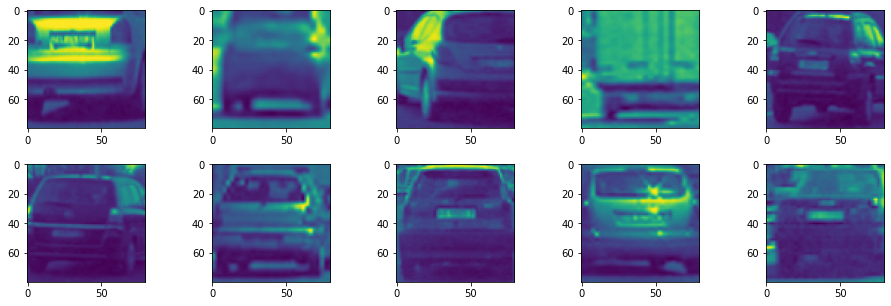

In [6]:
#@title Algunas imágenes
plt.figure(1, figsize=(16,5))
n=0
img_coches=np.array(img_coches)
for i in range(10):
  n += 1
  r = np.random.randint(0, img_coches.shape[0], 1)
  plt.subplot(2, 5, n) #numero de filas y cantidad de columnas de la grafica
  plt.subplots_adjust(hspace = 0.3, wspace =0.2)
  plt.imshow(np.squeeze(img_coches[r[0]]))

plt.show()

In [7]:
#@title Carga de imágenes de NO coches
img_size = 80
no_img_coches = []

for img in os.listdir(no_coches_far):
  img = cv2.imread(os.path.join(no_coches_far, img))
  img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  img_gray_resize = cv2.resize(img_gray, (img_size, img_size))
  no_img_coches.append([img_gray_resize])

for img in os.listdir(no_coches_left):
  img = cv2.imread(os.path.join(no_coches_left, img))
  img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  img_gray_resize = cv2.resize(img_gray, (img_size, img_size))
  no_img_coches.append([img_gray_resize])

for img in os.listdir(no_coches_middle):
  img = cv2.imread(os.path.join(no_coches_middle, img))
  img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  img_gray_resize = cv2.resize(img_gray, (img_size, img_size))
  no_img_coches.append([img_gray_resize])

for img in os.listdir(no_coches_right):
  img = cv2.imread(os.path.join(no_coches_right, img))
  img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  img_gray_resize = cv2.resize(img_gray, (img_size, img_size))
  no_img_coches.append([img_gray_resize])

print(len(no_img_coches))

3900


In [8]:
#@title Algunas imágenes
plt.figure(1, figsize=(16,5))
n=0
no_img_coches=np.array(no_img_coches)
for i in range(10):
  n += 1
  r = np.random.randint(0, no_img_coches.shape[0], 1)
  plt.subplot(2, 5, n) #numero de filas y cantidad de columnas de la grafica
  plt.subplots_adjust(hspace = 0.3, wspace =0.2)
  plt.imshow(np.squeeze(no_img_coches[r[0]]))

plt.show()

In [9]:
print(img_coches.shape, no_img_coches.shape) 

(3425, 1, 80, 80) (3900, 1, 80, 80)


In [10]:
#@title Redimensionando el dataset
img_coches2=np.resize(img_coches, (3425,6400))
no_img_coches2=np.resize(no_img_coches, (3900,6400))

In [11]:
print(img_coches2.shape, no_img_coches2.shape)

(3425, 6400) (3900, 6400)


In [12]:
#@title Añadiendo los labels y uniendo el dataset
img_coches2=pd.DataFrame(img_coches2)
no_img_coches2=pd.DataFrame(no_img_coches2)

img_coches2['label']=1  #son coches
no_img_coches2['label']=0 #no son coches

datos = img_coches2
datos = datos.append(no_img_coches2, ignore_index=True)
print(datos.shape)

(7325, 6401)


In [13]:
pd.DataFrame(datos).head()

0    1    2    3    4    5    6  ...  6394  6395  6396  6397  6398  6399  label
0  149  148  146  143  139  137  133  ...   151   160   171   181   188   190      1
1   95   95   95   95   96   96   97  ...   120   122   124   125   126   127      1
2  164  164  163  163  162  161  159  ...   155   154   156   158   159   159      1
3  164  164  163  163  162  161  160  ...   159   157   158   158   158   158      1
4  140  135  120   98   76   65   64  ...   107   107   107   107   107   107      1

[5 rows x 6401 columns]

In [14]:
#@title Revolviendo el dataset
datos = np.random.permutation(datos.values)


In [15]:
#@title Normalizar el dataset
X = datos[:,:-1]
y = datos[:,-1]
#normalizar el dataset para disminuir el tiempo de entrenamiento
X = X.astype(np.float32)
y = y.astype(np.int32)
X = X/255

In [16]:
pd.DataFrame(X).head()

0         1         2     ...      6397      6398      6399
0  0.815686  0.807843  0.807843  ...  0.305882  0.313726  0.329412
1  0.290196  0.286275  0.286275  ...  0.274510  0.274510  0.274510
2  0.160784  0.160784  0.160784  ...  0.227451  0.227451  0.227451
3  0.196078  0.196078  0.200000  ...  0.349020  0.349020  0.356863
4  0.360784  0.372549  0.400000  ...  0.360784  0.364706  0.333333

[5 rows x 6400 columns]

In [17]:
#@title Partición del dataset para train y test - training: 80% - test: 20%

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
print(X.shape, len(y))


(7325, 6400) 7325


In [18]:
#@title Estimadores
estimador_NB = GaussianNB()
estimador_RFC = RandomForestClassifier(max_depth=20)
estimador_DTC = DecisionTreeClassifier(max_depth=20)
estimador_SVC = SVC(kernel='rbf')

In [19]:
#@title Accuracy estimadores

#GaussianNB
estimador_NB.fit(X_train, y_train)
sc_NB = estimador_NB.score(X_test, y_test)
#RFC
estimador_RFC.fit(X_train, y_train)
sc_RFC = estimador_RFC.score(X_test, y_test)
#DTC
estimador_DTC.fit(X_train, y_train)
sc_DTC = estimador_DTC.score(X_test, y_test)
#SVC
estimador_SVC.fit(X_train, y_train)
sc_SVC = estimador_SVC.score(X_test, y_test)
print("GaussianNB:  "+"{0:.4f}".format(sc_NB)+
      "\nRandom Forest:  "+"{0:.4f}".format(sc_RFC)+
      "\nDecision Tree:  "+"{0:.4f}".format(sc_DTC)+
      "\nSVC:  "+"{0:.4f}".format(sc_SVC))

GaussianNB:  0.7659
Random Forest:  0.9638
Decision Tree:  0.9072
SVC:  0.9584


In [20]:
#@title Accuracy SVC para training
estimador_SVC.score(X_train, y_train)

0.9737201365187713

In [21]:
#@title Probando con varios kernels
kernels = ['linear', 'poly', 'rbf']
scores = []
scores_acc = []

for i in range(len(kernels)):
    estimator_SVC=SVC(kernel=kernels[i])
    estimator_SVC.fit(X_train, y_train)
    scores_acc.append(estimator_SVC.score(X_test, y_test))
    scores.append(mean_squared_error(y_test, estimator_SVC.predict(X_test)))
print(scores_acc, scores)

[0.9078498293515358, 0.9556313993174061, 0.9583617747440273] [0.09215017064846416, 0.04436860068259386, 0.041638225255972695]


In [22]:
#@title Usando pipeline
n_components = range(10,100,10)
means, stds = [], []
for n in n_components:
    print( n,)
    p = Pipeline((("pca", PCA(n_components=n)), ("classifier", SVC(kernel= 'rbf')) ))
    s = cross_val_score(p, X, y, cv=KFold(5, shuffle=True), scoring=make_scorer(accuracy_score))
    means.append(np.mean(s))
    stds.append(np.std(s))
means = np.r_[means]
stds  = np.r_[stds]

10
20
30
40
50
60
70
80
90


Text(0.5, 1.0, 'SVC')

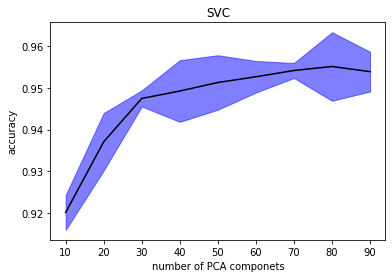

In [23]:
#@title Gráfica kernel rbf
plt.plot(n_components, means, color="black")
plt.fill_between(n_components, means-stds, means+stds, color="blue", alpha=.5)
plt.xlabel("number of PCA componets")
plt.ylabel("accuracy")
plt.title("SVC")

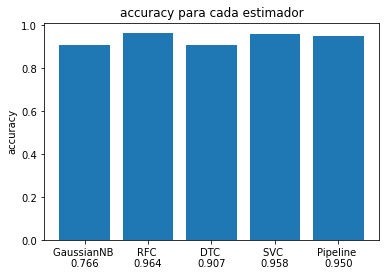

In [24]:
#@title Gráfica accuracy para cada estimador
p = Pipeline((("pca", PCA(n_components=50)), ("classifier", SVC(kernel= 'rbf')) ))
s = cross_val_score(p, X, y, cv=KFold(5, shuffle=True), scoring=make_scorer(accuracy_score))

estimadores = ["GaussianNB \n"+"{0:.3f}".format(sc_NB),"RFC \n"+"{0:.3f}".format(sc_RFC),"DTC \n"+"{0:.3f}".format(sc_DTC),"SVC \n"+"{0:.3f}".format(sc_SVC),"Pipeline \n"+"{0:.3f}".format(np.mean(s))]
accuracy = [sc_DTC,sc_RFC,sc_DTC,sc_SVC,np.mean(s)]
fig, ax = plt.subplots()
ax.set_ylabel('accuracy')
ax.set_title('accuracy para cada estimador')
plt.bar(estimadores, accuracy)
plt.show()

<center><h1>Se decide trabajar con SVC</h1></center>

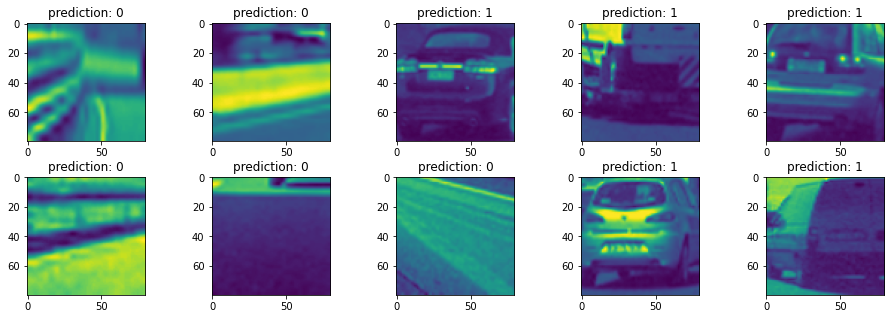

In [55]:
#@title aprendizaje automático en acción: (predicciones en X_test)
plt.figure(1, figsize=(16,5))
n=0
for i in range(10):
  n += 1
  r = np.random.randint(0, X_test.shape[0], 1)
  plt.subplot(2, 5, n) #numero de filas y cantidad de columnas de la grafica
  plt.subplots_adjust(hspace = 0.3, wspace =0.2)
  plt.imshow(np.squeeze(X_test[r].reshape(1, 80, 80)))
  plt.title("prediction: "+str(int(estimador_SVC.predict(X_test[r]))))

plt.show()

<center><h1>Aplicación del proyecto a la vida real</h1></center>

In [44]:
#@title Trabajando con imágenes reales
vias_bucaramanga="/content/drive/MyDrive/Proyecto IA/Bucaramanga"

img_size = 800
coches_bucaramanga = []

for img in os.listdir(vias_bucaramanga):
  img = cv2.imread(os.path.join(vias_bucaramanga, img))
  img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  img_gray_resize = cv2.resize(img_gray, (img_size, img_size))
  coches_bucaramanga.append([img_gray_resize]) 

print(len(coches_bucaramanga))

63


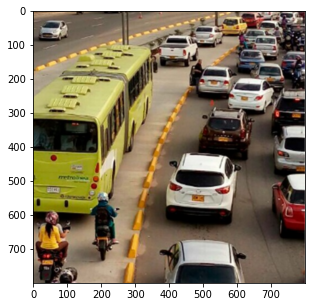

In [53]:
#@title Ejemplo de imagen real
img_size = 800
n=-1
for example in os.listdir(vias_bucaramanga):
  n=n+1
  if n==62:
    example = cv2.imread(os.path.join(vias_bucaramanga, example))
    example_color = cv2.cvtColor(example, cv2.COLOR_BGR2RGB)
    example_resize = cv2.resize(example_color, (img_size, img_size))
    break

plt.figure(1, figsize=(16,5))
plt.imshow(example_resize)

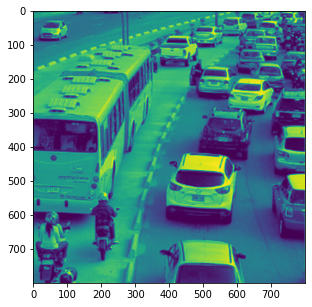

In [54]:
#@title Escala de grises
plt.figure(1, figsize=(16,5))
plt.imshow(np.squeeze(np.array(coches_bucaramanga[62])))

In [46]:
#@title Redimensionamos cada una de las imágenes
coches_bucaramanga=np.array(coches_bucaramanga)
aux = []
for i in range(len(coches_bucaramanga)):
  aux.append(coches_bucaramanga[i].reshape( 800, 800))
img = np.array(aux)

In [47]:
#@title Partiendo cada una de las imágenes
img_out = []
for j in range(len(coches_bucaramanga)):
  aux = []
  a = 0
  b = 80

  for i in range(10):
    c=0
    d=80
    for k in range(10):
      aux.append(img[j][a:b,c:d])
      c=c+80
      d=d+80
    a=a+80
    b=b+80
  img_out.append(aux)

img_out = np.array(img_out)

In [48]:
img_out = np.array(img_out)
img_out.shape

(63, 100, 80, 80)

In [49]:
#@title Redimensionando cada una de las particiones
img_out2 = []
for j in range(len(coches_bucaramanga)):
  aux=[]
  for i in range(100):
    aux.append(np.resize(img_out[j][i], (1,6400)))
  
  img_out2.append(aux)

In [50]:
#@title Normalizando las nuevas imágenes
img_out2=np.array(img_out2)
img_out2=img_out2.astype(np.float32)
img_out2=img_out2/255

In [52]:
#@title Resultado Final :D
plt.figure(1, figsize=(30,40))
n=0
for i in range(100):
  n += 1
  plt.subplot(10, 10, n) #numero de filas y cantidad de columnas de la grafica
  plt.subplots_adjust(hspace = 0.3, wspace =0.2)
  plt.imshow(np.squeeze(img_out[62][i])) # el [0] representa el id de la imagen :D
  plt.title("prediction: "+str(int(estimador_SVC.predict(img_out2[62][i]))))

plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [56]:
#@title Analizando las imágenes reales
from os.path import basename

datos = []
j = 0
for k in os.listdir(vias_bucaramanga):
  predicciones =[]
  numero = 0
  for i in range(100):
    predicciones.append(estimador_SVC.predict(img_out2[j][i]))

  for i in range(len(predicciones)):
    if (predicciones[i]==1):
      numero = numero+1

  numero=int(numero)

  if (numero>=40):
    text = "No Apto Para Ciclovía"
  elif (numero < 40 and numero>30):
    text = "Se Requieren Más Estudios"
  else:
    text = "Apto Para Ciclovía"
    
  name = os.path.splitext(os.path.basename(k))[0]

  tabla = {"Calle": name, "Intensidad": str(numero)+"%", "Resultados": text}
  datos.append(tabla)
  j = j + 1

result = pd.DataFrame(data=datos)
result.tail()

Calle Intensidad             Resultados
58       Via_satelite8        17%     Apto Para Ciclovía
59     Via_autopista15        78%  No Apto Para Ciclovía
60     Via_autopista16        55%  No Apto Para Ciclovía
61  Viaducto_la_flora4        64%  No Apto Para Ciclovía
62  Viaducto_la_flora3        46%  No Apto Para Ciclovía